In [1]:
import pandas as pd
import sys
# sys.path.append('E:\Package\Boilerplate\morethansentiments\src')
import MoreThanSentiments as mts

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import importlib
importlib.reload(mts)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


<module 'MoreThanSentiments' from 'e:\\package\\boilerplate\\morethansentiments\\src\\MoreThanSentiments.py'>

In [3]:
mts.test_func()

'Lib is ready'

### Read Data

In [12]:
my_dir_path = "/content/business"

In [13]:
df = mts.read_txt_files(PATH = my_dir_path)
display(df)

,file_num,text
0,001.txt,Ad sales boost Time Warner profit Quarterly p...
1,002.txt,Dollar gains on Greenspan speech The dollar h...
2,003.txt,Yukos unit buyer faces loan claim The owners ...
3,004.txt,High fuel prices hit BA's profits British Air...
4,005.txt,Pernod takeover talk lifts Domecq Shares in U...
...,...,...
505,506.txt,Trial begins of Spain's top banker The trial ...
506,507.txt,UK economy ends year with spurt The UK econom...
507,508.txt,HealthSouth ex-boss goes on trial The former ...
508,509.txt,Euro firms miss out on optimism More than 90%...


### Preprocess data

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jinha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
df['sent_tok'] = df.text.apply(mts.sent_tok)

In [16]:
df['cleaned_data'] = pd.Series()    
for i in range(len(df['sent_tok'])):
    df['cleaned_data'][i] = [mts.clean_data(x,\
                                            lower = True,\
                                            punctuations=True,\
                                            number=False,\
                                            unicode=True,\
                                            stop_words=False) for x in df['sent_tok'][i]] 

In [17]:
%%time
df['Boilerplate'] = mts.Boilerplate(df.cleaned_data, n = 4, min_doc = 30, get_ngram = False)
df['Boilerplate'].mean()

Flag the Sentence: 100%|██████████████████████████████████████████████████████████| 510/510 [00:00<00:00, 12132.30it/s]


'======================== Boilerplate Calculation Started ========================='

'======================== Boilerplate Calculation Finished ========================'

Wall time: 679 ms


0.005362744744868861

In [18]:
df['Boilerplate'] = mts.Boilerplate(df.cleaned_data, n = 4, min_doc = 0.058, get_ngram = False)
df['Boilerplate'].mean()

Flag the Sentence: 100%|███████████████████████████████████████████████████████████| 510/510 [00:00<00:00, 9991.29it/s]


'======================== Boilerplate Calculation Started ========================='

'======================== Boilerplate Calculation Finished ========================'

0.005362744744868861

In [19]:
ngram_list = mts.Boilerplate(df.cleaned_data, n = 4, min_doc = 30, get_ngram = True)
ngram_list

Get the Boilerplate: 100%|█████████████████████████████████████████████████████████| 510/510 [00:00<00:00, 7720.53it/s]


,unique_ngrams,counts
0,"(said, in, a, statement)",32
1,"(for, the, first, time)",19
2,"(the, bank, of, england)",19
3,"(securities, and, exchange, commission)",19
4,"(by, the, end, of)",18
...,...,...
131836,"(from, mr, glazer, which)",1
131837,"(from, mr, ghosn, who)",1
131838,"(from, mr, blair, more)",1
131839,"(from, more, than, 3)",1


In [20]:
%%time
df['Redundancy'] = mts.Redundancy(df.cleaned_data, n = 10)
df['Redundancy'].mean()

Get the Redundancy: 100%|██████████████████████████████████████████████████████████| 510/510 [00:00<00:00, 5856.99it/s]


Wall time: 709 ms


0.00021794659723537864

In [21]:
%%time
df['Specificity'] = mts.Specificity(df.text)
df['Specificity'].mean()

Get the Specificity: 100%|███████████████████████████████████████████████████████████| 510/510 [00:17<00:00, 28.35it/s]

Wall time: 18.4 s


0.12135347895305168

In [23]:
import spacy
ner = spacy.load('en_core_web_sm')
len(ner(df.text[0]).ents)/len(df.text[0].split())

0.15676959619952494

In [24]:
%%time
df['Relative_prevalence'] = mts.Relative_prevalence(df.text)
df['Relative_prevalence'].mean()

Get the Relative_prevalence: 100%|█████████████████████████████████████████████████| 510/510 [00:00<00:00, 6839.74it/s]

Wall time: 77.1 ms


0.006512135012418132

<AxesSubplot:>

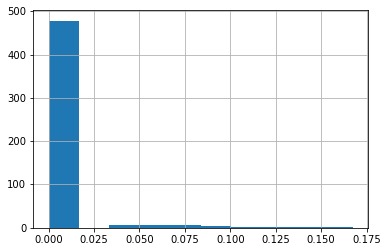

In [26]:
df['Boilerplate'].hist()